<p align="center">
  <img src="https://i.ibb.co/5Y2YwpC/313132131.png" alt="UFPA" width=100/>
  <img src="https://i.ibb.co/wwXNYvM/abc.png" alt="ENGCOMP" width=100/>
</p>

<p align="center">
  <b>SERVIÇO PÚBLICO FEDERAL<br>
  MINISTERIO DA EDUCAÇÃO<br>
  UNIVERSIDADE FEDERAL DO PARÁ<br>
  CAMPUS TUCURUÍ<br>
  ENGENHARIA DA COMPUTAÇÃO</b>
</p>

---
###**Trabalho de Conclusão de Disciplina**
> **Disciplina**: Processamento Digital de Sinais<br>
> **Assunto**: Projeto e Implementação de Filtro Digital<br>
> **Professor**: Cleison Daniel Silva<br>
> **Aluno**: Danilo de Sousa Lopes<br>
> **Matrícula**: 201833840019<br>
> **Data**: 29/06/2022<br>

#**Análise da influência dos movimentos oculares em sinais de EEG**

###**Introdução**
> Além dos ruídos de natureza técnica, biopotenciais indesejados, oriundos da atividade elétrica em outras partes do corpo humano, podem interferir significativamente na leitura do potencial elétrico que descreve a atividade neuronal no eletroencefalograma (EEG) (NIDAL; MALIK, 2014).
>
> Esses ruídos, geralmente chamados de artefatos, são originados de fontes diversas como:
*   Piscadas ou movimento do globo ocular
*   Atividade muscular da cabeça: pescoço e mandíbula
*   Atividade cardíaca

###**Motivações**

>*   O processo de filtragem minimiza a interferência artefatos que prejudicam a qualidade dos sinais de EEG para fins de estudos científicos.
*   Além disso, existem fenômenos fisiológicos que ocorrem em faixas de frequências específicas, que podem ser selecionadas através de processos de filtragem.
*   Não obstante, a interferência dos artefatos presentes nos sinais de EEG tem impactos negativos consideráveis em sistemas de Interface Cérebro Máquina (ICM) baseados nesses biosinais, as quais buscam interpretar as atividades cerebrais para fins de comunicação ou interação com o ambiente externo.

###**Objetivo**
>Desenvolver um filtro capaz de minimizar a interferência de biopotenciais indesejados, mais especificamente o movimento do globo ocular, nos sinais de EEG.

###**Conjunto de Dados**
>BCI Competition 2008 - Graz data set A
Dataset BCICIV_2A

###**Etapas do Projeto**
> O projeto e a implementação do filtro deve contemplar as seguintes etapas:
1. Definir o sinal em tempo contínuo;
2. Análise do sinal contínuo no domínio da frequência;
3. Definir o filtro anti-aliasing e a frequência de amostragem apropriada;
4. Amostrar e reconstruir o sinal contínuo;
5. Análise do sinal discreto no domínio da frequência;
6. Definir a banda de frequência de interesse de acordo com a aplicação selecionada;
7. Definir as especificações do Filtro Digital e Projetar o Filtro;
8. Análise do sinal de saída do filtro digital;
9. Comentar e justificar todas as etapas;
10. Simulação e implementação completa



###**Importações**

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz, buttord, freqs
import scipy.io

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**Setup**

In [17]:
# Frequência de Amostragem
fs = 250

# Canais de interesse
channels_interest = [23,0,3,9,15,19,21]

# Quantidade de amostras selecioandas
sample = np.arange(0,5000) # 20 segundos

# Carregando os Dados
dataset = np.load('/content/drive/MyDrive/Colab Notebooks/learn_PDS/A01T.npy')

# Selecionando o canal de EOG central
eog = dataset[23,2000:7000]

# Selecionando o canal 1 EEG
eeg = dataset[0,2000:7000]

###**1. Definir o sinal em tempo contínuo**
> O conceito de tempo contínuo é geralmente confundido com o conceito de analógico. Os dois conceitos são diferentes. O mesmo é válido para os conceitos de tempo discreto e digital.
>
>Um sinal cuja amplitude pode assumir qualquer valor em uma faixa contínua é um *sinal contínuo*. Isto significa que a amplitude de um sinal analógico pode assumir infinitos valores. Um *sinal digital*, por outro lado, é aquele cuja amplitude pode assumir apenas alguns números finitos de valores.
*   Os termos *contínuo no tempo* e *discreto no tempo* qualificam a natureza do sinal ao longo do eixo de tempo (eixo horizontal).
*   Os termos *analógico* e *digital*, por outro lado, qualificam a natureza da amplitude do sinal (eixo vertical).
>
><p align="center">
  <img src="https://i.ibb.co/dkyCJHV/ex-continuo-discreto.png" alt="UFPA" height="300" width="400"/>
  </p>
> 
> No caso de biosinais, podemos defini-los como:
*   Sinais analógicos contínuos no tempo
>
> Mesmo que a natureza da maioria dos sinais que nos deparamos no dia a dia seja de tempo contínuo, apenas sinais discretos podem ser armazenados e processados em computadores, se tornando assim, sinais digitais.











###**2. Análise do sinal contínuo no domínio da frequência**
> Apesar de parecer mais intuitivo, analisar um sinal no domínio do tempo muitas vezes não é a melhor abordagem.
>
> Sinais periódicos desvanecidos devido ruídos no domínio do tempo, são facilmente destacados e identificados no *domínio da frequência*.
><p align="center">
  <img src="https://i.ibb.co/YXTZZM8/espectro.png" alt="UFPA" height="350" width="500"/></p>
>
> A análise no domínio da frequência de sinais periódicos se dá por meio da **Série de Fourier**, que torna possível decompor uma função em termos das funções seno e cosseno.
><p align="center" size="10">
  <font size="2"><b>Formula da Série de Fourier</b></font><br>
  <img src="https://i.ibb.co/tCsSp06/serie-fourier.png" alt="UFPA" height="140" width="290"/>
>
>Para sinais não periódicos, considera-se um sinal periódico de período infinito. Assim a série torna-se uma integral e tem-se a definição de **Transformada de Fourier**.
><p align="center" size="10">
  <font size="2"><b>Formula da Transformada de Fourier</b></font><br>
  <img src="https://i.ibb.co/gVm5bvf/transform-fourier.png" alt="UFPA" height="100" width="200"/>
>
>Neste estudo os sinais utilizados já se encontram discretizados, portanto, daremos continuidade posteriormente na análise dos sinais discretos no domínio da frequência.
>
>Os sinais discretizados se diferenciam dos sinais contínuos em dois pontos importantes: amostragem e quantização.
>
>Portanto, para uma eficiente digitalização de um sinal é importante definir: a frequência de amostragem, o número de bits e o tipo de filtro analógico "anti-aliasing" necessário para converter um sinal analógico para digital.




###**3. Definir o filtro anti-aliasing e a frequência de amostragem apropriada**
>O **Teorema da amostragem de Shannon** ou **teorema da amostragem de Nyquist** - (1940), afirma que um sinal contínuo é amostrado propriamente, podendo ser posteriormente recuperado como o sinal analógico a partir do amostrado, apenas se o sinal original não conter frequências acima da metade da razão de amostragem, para que isso seja possível faz se uso de um filtro *anti-aliasing* capaz de remover as componentes de frequência acima da metade da razão de amostragem. A Frequência de Nyquist ou Razão de Nyquist é igual à metade da frequência de amostragem.
>
>**Trem de impulsos** é um sinal contínuo com uma série de impulsos (infinitamente estreitos) que se igualam ao sinal original no instante da amostragem. É uma ponte para atravessar do mundo analógico para o digital.
>
>Na frequência espectral ocorre duplicação do espectro do sinal original em cada múltiplo da frequência de amostragem, fs, 2 fs, 3 fs,... etc. Para o lado esquerdo dos múltiplos tem-se a banda inferior (lower sideband) e para o lado direito a banda superior (upper sideband).
Para recuperar o sinal é necessário eliminar as frequências acima de 0,5 fs.
>
>No contexto deste trabalho o conjunto de dados apresenta as seguintes especificações:
>*   **Frequência de Amostragem**: 250 HZ
>*   **Filtro Anti-aliasing**: Bandpass
>*   **Frequência da banda de passagem**: 0,5 Hz e 100 Hz
>*   **Filtro Notch adicional**: 50 Hz







###**4. Amostrar e reconstruir o sinal contínuo**
> Embora essa etapa não seja realizada neste projeto devido nossa atuação ser apenas no sinal de EEG que já se encontra em formato digital e discreto no tempo, é fundamental compreender os principais processos que estão relacionados à reconstrução do sinal amostrado em tempo discreto, para tempo contínuo.
>
>A conversão Digital para Analógica consiste em tomar-se às amostras da memória e convertê-las em um trem de impulsos que em seguida é aplicado a um filtro passa-baixas com frequência de corte (no máximo) igual à metade da frequência de amostragem.
>
>Devido a dificuldade em se gerar um pulso estreito em eletrônica, os DAC costumam apresentar um *sample–and–hold* em sua saída, o que segura o valor da amostra até que a próxima amostra seja apresentada. Este dispositivo é chamado de hold de ordem zero. Um hold de primeira ordem faria a união das duas amostras por uma linha reta e um hold de segunda ordem usaria parábolas.
>
><p align="center" size="10">
  <font size="2"><b>Diagrama em blocos de um sistema de processamento digital de sinais</b></font><br>
  <img src="https://i.ibb.co/fvVJJXg/diagrama-de-bloco.png" alt="UFPA" height="200" width="630"/>
>




###**4.5 Definir o sinal digital em tempo discreto**
>O objeto de estudo deste projeto são os sinais de EEG, nesta etapa vamos analisar a influência dos movimentos oculares sobre eles.
>
>O conjunto de dados é composto por sinais de EEG coletados a partir de 25 canais distribuídos pelo escalpo, o padrão de posicionamento dos eletrodos corresponde ao sistema internacional ISO 10-20.
><p align="center" size="10">
  <font size="2"><b>Distribuição dos eletrodos no escalpo</b></font><br>
  <img src="https://i.ibb.co/8MgdYL1/iso.png" alt="UFPA" height="280" width="450"/>
>
>Dentre os 25 canais temos:
>*   22 Canais de Eletroencefalografia
>*   3 Canais de Eletro-oculografia
>
>Para enfatizarmos a visualização da influência do biopotencial indesejado dos movimentos oculares, selecionamos os 6 canais centrais de EEG e o canal central de EOG #2.




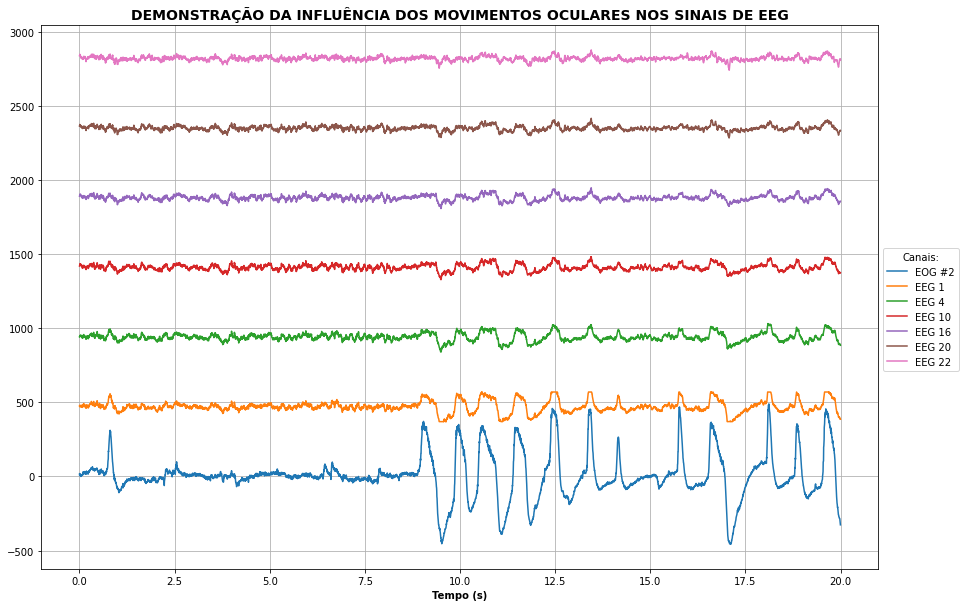

In [20]:
plt.figure(figsize=(15,10))
channels_name = ['EOG #2','EEG 1','EEG 4','EEG 10','EEG 16','EEG 20','EEG 22']
for i in range(7):
  plt.plot(sample/fs, i*470 + dataset[channels_interest[i],2000:7000], label=channels_name[i])
plt.legend(title='Canais:',bbox_to_anchor = (1.0, 0.6))
plt.title('DEMONSTRAÇÃO DA INFLUÊNCIA DOS MOVIMENTOS OCULARES NOS SINAIS DE EEG', fontsize=14, weight='bold')
plt.xlabel('Tempo (s)', fontsize=10, weight='bold')
plt.grid()
plt.show()

> Perceba como a influência do biopotencial indesejado dos movimentos oculares se propaga em relação aos canais de EEG.
> A partir de tais inferências, vamos selecionar apenas o canal de EEG 1, para demonstrar a realização das demais etapas, entretanto os processos de filtragem em geral, são aplicados em todo o conjunto de dados. 

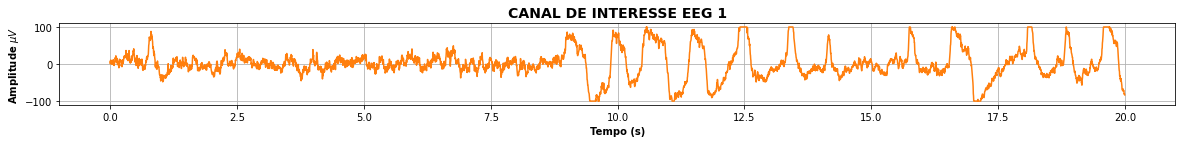

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


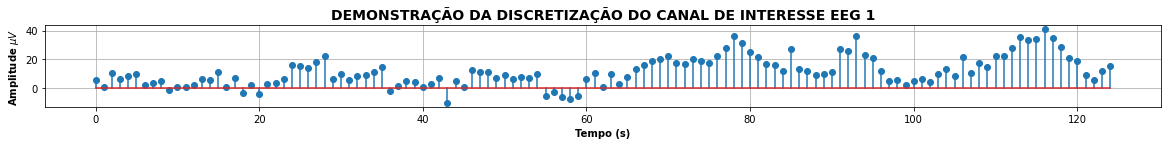

In [22]:
# Selecionando o canal 0 para realização do experimento
plt.figure(figsize=(20,1.5))
plt.plot(sample/fs, eeg, c='tab:orange')
plt.title('CANAL DE INTERESSE EEG 1', fontsize=14, weight='bold')
plt.xlabel('Tempo (s)', fontsize=10, weight='bold')
plt.ylabel('Amplitude $\mu V$', fontsize=10, weight='bold')
plt.grid()
plt.show()

# Demonstração da discretização do sinal de EEG
# Frequência de Amostragem = 250 Hz
# Período de Amostragem = 0,004 s 
plt.figure(figsize=(20,1.5))
plt.stem(np.arange(0,125), eeg[0:125])
plt.title('DEMONSTRAÇÃO DA DISCRETIZAÇÃO DO CANAL DE INTERESSE EEG 1', fontsize=14, weight='bold')
plt.xlabel('Tempo (s)', fontsize=10, weight='bold')
plt.ylabel('Amplitude $\mu V$', fontsize=10, weight='bold')
plt.grid()
plt.show()

###**5. Análise do sinal discreto no domínio da frequência**
>A Transformada de Fourier já foi apresentada anteriormente para sinais contínuos no tempo, entretanto, para sequências de duração finita é possível desenvolver uma representação alternativa de Fourier, designada de **Transformada Discreta de Fourier** (DFT - Discrete Fourier Transform). Ao contrário das transformadas estudadas anteriormente, a DFT também é uma sequência e corresponde a amostras igualmente espaçadas em frequência da transformada de Fourier.
>
>A DFT desempenha um papel central na implementação de uma variedade de algoritmos de processamento de sinal.
>
>Ademais, no mundo digital optamos ainda por uma versão otimizada da DFT, em 1965 Cooley e Tukey desenvolveram um algoritmo capaz de reduzir drasticamente o número de cálculos necessários para executar a DFT. Esse algoritmo foi chamado de **Transformada rápida de Fourier** (FFT - Fast Fourier Transform).
>
>Para realizar a análise do sinal discretizado de EEG no domínio da frequência, iremos fazer uso de tal algoritmo.

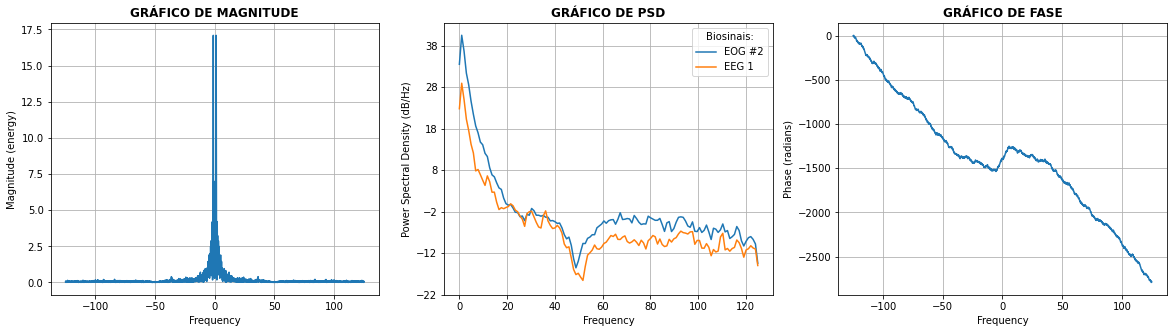

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)  
plt.magnitude_spectrum(eeg, Fs=fs, sides='twosided')
plt.title('GRÁFICO DE MAGNITUDE', weight='bold')
plt.grid()

plt.subplot(1, 3, 2)
x = eeg-np.mean(eeg)
y = eog-np.mean(eog)
plt.psd(y, Fs=fs, label='EOG #2', c='tab:blue')
plt.psd(x, Fs=fs, label='EEG 1', c='tab:orange')
plt.legend(title='Biosinais:')
plt.title('GRÁFICO DE PSD', weight='bold')

plt.subplot(1, 3, 3)
plt.phase_spectrum(eeg, Fs=fs, sides='twosided')
plt.title('GRÁFICO DE FASE', weight='bold')
plt.grid()
plt.show()

>O **Gráfico de Magnitude** apresenta o espectro do sinal de EEG no domínio da frequência, perceba que temos uma grande quantidade de baixas frequências e uma magnitude cada vez maior, quando nos aproximamos de da frequência 0, oque caracteriza uma incidência de ruídos.
>
>O **Gráfico de Densidade Espectral de Potência** (PSD) representa a distribuição de frequência da potência de um sinal de acordo com as frequências que o compõem. É usado para caracterizar sinais aleatórios gaussianos estacionários e ergódicos e é essencial para a quantificação de ruído eletrônico. Note que a partir desse gráfico, podemos inferir claramente que o maior potencial de ruído se encontra nos níveis DC do sinal de EEG e também a maior influência do sinal de EOG.
>
>Vale destacar que as propriedades da Transformada de Fourier implicam que a densidade espectral é a Transformada de Fourier de autocorrelação, este é o teorema de Wiener-Khintchine.
>
>Existem situações em que temos que processar sinais aleatórios. No entanto, não se pode calcular a transformada de Fourier de um sinal que não é totalmente conhecido. Por outro lado, podemos calcular a autocorrelação de um sinal aleatório conhecido por suas propriedades estatísticas.
>
>O **Gráfico de Fase** por sua vez, não sofre influência quanto ao processo de filtragem do sinal, o mesmo indica o posicionamento do sinal no tempo, como não será aplicado nenhum processo de atraso ou adiantamento do sinal, suas características serão mantidas.

###**6. Definir a banda de frequência de interesse de acordo com a aplicação selecionada**
>Os artefatos de EOG são, principalmente, captados pelos eletrodos frontais, embora também se estendam para outros canais (ROMERO; MAÑANAS; BARBANOJ, 2008). As piscadas causam mudanças abruptas no sinal de EEG em frequências mais baixas (<4 Hz Ritmos Delta), já a movimentação dos olhos causa maior interferência na faixa de frequência mais alta (>13 Hz) (URIGÜEN; GARCIA-ZAPIRAIN, 2015).
>
>O EEG é um dos sinais mais vulneráveis a influências eletromagneticas. Como por exemplo, a presença de sinais no ambiente da aquisição que interferem no sinal analisado, tais como a rede elétrica (60 Hz), radiações eletromagnéticas emitidas por aparelhos eletroeletrônicos e torres de transmissão de sinais de TV, rádio e celulares (DUTRA, 2012).
>
>Portanto um filtro passa banda, com frequências de corte entre 6 Hz e 48 Hz, atuaria em nossas duas principais fontes de ruídos.



###**7. Definir as especificações do Filtro Digital e Projetar o Filtro**
> Dentre os diversos tipos de filtros, para a problemática em questão escolheu-se o **Filtro Butterworth** do tipo passa banda, devido o mesmo apresentar a resposta em amplitude mais plana possível na banda passante.
><p align="center" size="10">
  <font size="2"><b>Demonstração da Respota em Frequência dos Principais Filtros</b></font><br>
  <img src="https://i.ibb.co/R3SmKC5/butter.png" alt="UFPA" height="280" width="450"/>
>
> Com o tipo de filtro definido e as frequências de corte, podemos partir para a próxima etapa, a definição da ordem do filtro.
>*   Quanto mais alta a ordem, mais próximo do ideal será o filtro.
>*   Quanto mais alta a ordem, maior o número de componentes e complexidade do filtro.
>
>Para obtermos o melhor trade-off entre as duas relações, vamos utilizar a função *siginal.buttord()*, que nós retornará a melhor ordem para a situação em questão.
>
>**Espeficações do Filtro**:
*   Taxa de Amostragem: 250 Hz
*   Frequência de Corte na banda de passagem 1: 6 Hz
*   Frequência de Corte de banda de parada 1: 4 Hz
*   Frequência de Corte na banda de passagem 2: 48 Hz
*   Frequência de Corte de banda de parada 2: 50 Hz
*   Ondulação da banda de passagem: 0.5 db
*   Atenuação da banda de parada: 10 db






In [24]:
# Frequência de Corte na banda de passagem 1
fpb = 6/(fs/2)

# Frequência de Corte de banda de parada 1
fsb = 4/(fs/2)

# Frequência de Corte na banda de passagem 2
fpb2 = 48/(fs/2)

# Frequência de Corte de banda de parada 2
fsb2 = 55/(fs/2)

# Ondulação da banda de passagem
alpha_ap = 0.5

# Atenuação da banda de parada em db
alpha_as = 10

N, Wn = buttord([fpb,fpb2], [fsb,fsb2], alpha_ap, alpha_as)
print('A melhor ordem para essas especificacoes eh: ',N)

A melhor ordem para essas especificacoes eh:  10


><p align="center" size="10">
  <img src="https://i.ibb.co/qFVNZRd/Resposta-em-Freq.png" alt="UFPA" height="380" width="650"/>
>
>O gráfico da resposta em frequência do filtro projetado, foi desenvolvido através da aplicação open source chamada pyfda, utilizada para analisar e projetar filtros de tempo discreto com uma interface gráfica amigável.
>
>A partir da análise da resposta em frequência, podemos inferir que o filtro projetado atende às restrições impostas, obtendo assim um bom desempenho e com a mínima ordem possível. 
>
>Vale destacar que a atenuação na segunda banda de passagem do filtro, apresenta uma maior região de transição, para aplicação em questão essa influência não é prejudicial pois o conjunto de dados em 50 Hz já está sendo filtrado pelo filtro notch adicional, portanto, frequências acima dessa faixa já estão sendo consideradas como ruído de rede.

###**8. Análise do sinal de saída do filtro digital**

In [25]:
# Instanciado um filtro Butterworth passa faixa de 5ª ordem.
b, a = butter(N,[fpb,fpb2], btype='bandpass', analog=False)

#Filtrando o canal de EEG 1
eeg_filter = lfilter(b,a, eeg)

#Filtrando todos os canais do dataset
dataset_filter = lfilter(b,a, dataset)

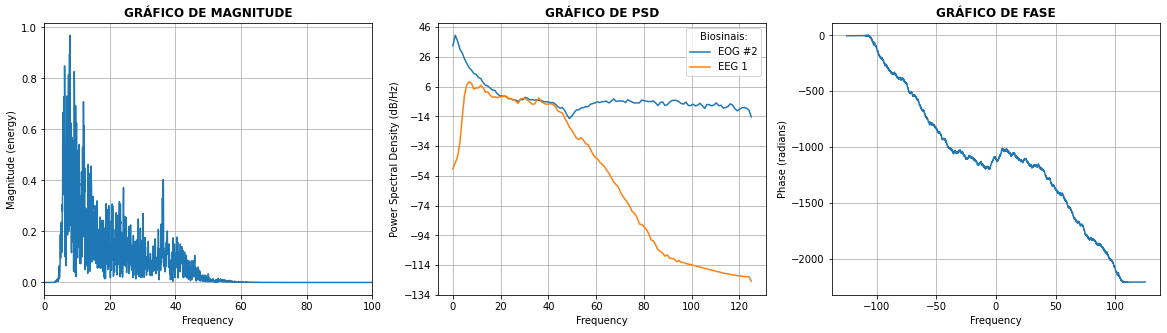

In [26]:
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)  
plt.magnitude_spectrum(eeg_filter, Fs=fs, sides='twosided')
plt.xlim(0,100)
plt.title('GRÁFICO DE MAGNITUDE', weight='bold')
plt.grid()

plt.subplot(1, 3, 2)
x = eeg_filter-np.mean(eeg_filter)
y = eog-np.mean(eog)
plt.psd(y, Fs=fs, label='EOG #2', c='tab:blue')
plt.psd(x, Fs=fs, label='EEG 1', c='tab:orange')
plt.legend(title='Biosinais:')
plt.title('GRÁFICO DE PSD', weight='bold')

plt.subplot(1, 3, 3)
plt.phase_spectrum(eeg_filter, Fs=fs, sides='twosided')
plt.title('GRÁFICO DE FASE', weight='bold')
plt.grid()
plt.show()

>### **Resultados após a filtragem do sinal de EEG**
>**Gráfico de Magnitude** 
>
>Após o processo de filtragem as baixas frequências presentes no nível DC do sinal foram todas atenuadas juntamente com as frequências acima de 50 Hz que caracterizam os ruídos de rede.  
>
>**Gráfico de Densidade Espectral de Potência**
>
>Já no gráfico de densidade espectral de potência do sinal, nota-se que a influência do canal de EOG em relação ao canal de EEG foi drasticamente reduzida, juntamente com as frequências acima de 50 Hz.

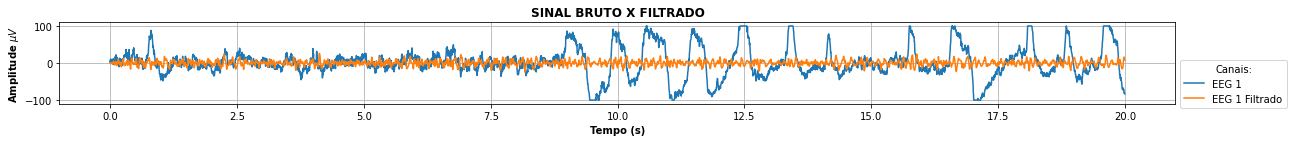

In [79]:
plt.figure(figsize=(20,1.5))
plt.plot(sample/fs, eeg, label='EEG 1')
plt.plot(sample/fs, eeg_filter, label='EEG 1 Filtrado')
plt.title('SINAL BRUTO X FILTRADO', weight='bold')
plt.xlabel('Tempo (s)', fontsize=10, weight='bold')
plt.ylabel('Amplitude $\mu V$', fontsize=10, weight='bold')
plt.legend(title='Canais:',bbox_to_anchor = (1.0, 0.6))
plt.grid()
plt.show()

>Ainda que no domínio do tempo as interpretações quanto a filtragem não sejam tão claras, ao realizar um contraste entre o sinal bruto e o sinal filtrado, podemos perceber claramente a diferença entre os dois sinais. Nota-se que existiam regiões do sinal bruto que apresentaram amplitudes de até 100 $\mu V$, enquanto que no sinal filtrado a amplitude não passa de 50 $\mu V$.

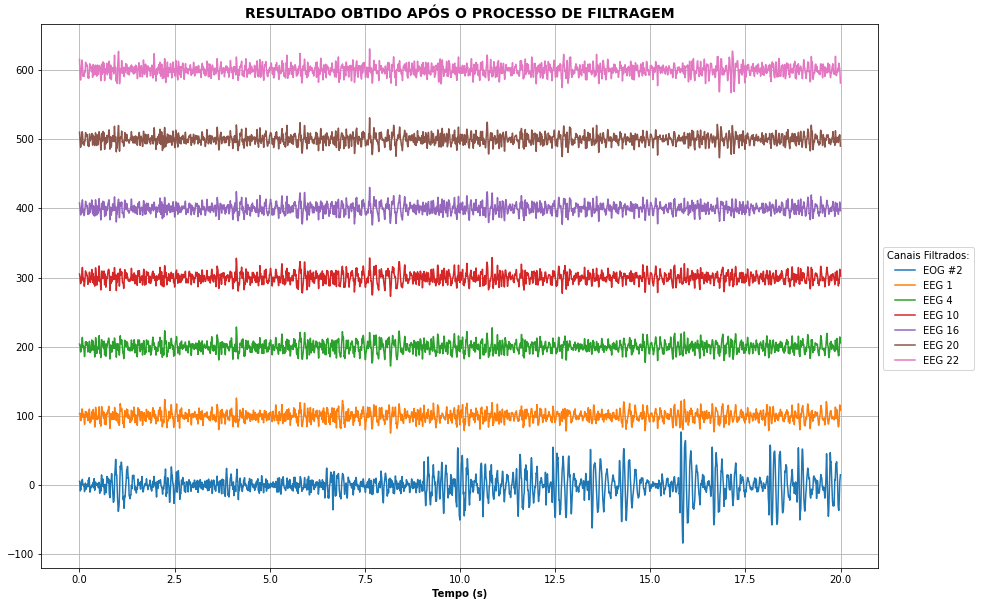

In [29]:
plt.figure(figsize=(15,10))
for i in range(7):
  plt.plot(sample/fs, i*100 + dataset_filter[channels_interest[i],2000:7000], label=channels_name[i])
plt.legend(title='Canais Filtrados:',bbox_to_anchor = (1.0, 0.6))
plt.title('RESULTADO OBTIDO APÓS O PROCESSO DE FILTRAGEM', fontsize=14, weight='bold')
plt.xlabel('Tempo (s)', fontsize=10, weight='bold')
plt.grid()
plt.show()

###**9. Conclusão**
>Os processos de filtragem de sinais digitais são bastante utilizados em inúmeras aplicações, devido aos grandes benefícios que essas técnicas podem agregar para os sistemas alvos. 
>
>No contexto de sinais biomédicos, as técnicas de filtragem são essencias para a melhor compressão e evidenciação de características que descrevem um fenômeno, seja ele de qualquer tipo. Os sinais de EEG por sua vez, são facilmente influenciados por ruídos, fazendo com que em geral as aplicações que utilizam esse biosinal como fonte de informações, necessitem de processos de filtragem.
>
>Este projeto, buscou percorrer os principais tópicos relacionados a projeção de filtros digitais, juntamente com um estudo de caso da influência do biopotencial indesejado dos movimentos oculares em sinais de EEG, afim de contribuir com a melhor compressão da problemática e propor um filtro capaz de minimizar essa influência.
>
>O filtro projetado apresentou resultados promissores, entretanto, na banda de passagem do filtro, ainda se encontram influências dos movimentos oculares. Como trabalhos futuros é sugerido a agregação de outras técnicas de remoção de artefatos dos sinais de EEG, como o método Local SSA (*Local Singular Spectrum Analysis*) que remove os artefatos oculares sem perder amostras do sinal.

###**10. Referências Bibliográficas**
>OPPENHEIM, Alan V.; SCHAFER, Ronald W. **Processamento em tempo discreto de sinais**. Tradução Daniel Vieira. 3ª ed.-São Paulo: Pearson Education do Brasil, 2012.
>
>LATHI, Bhagwandas Pannalal. **Sinais e sistemas lineares-2**. Bookman, 2006.
>
>NIDAL, Kamel; MALIK, Aamir Saeed (Ed.). **EEG/ERP analysis: methods and applications**. Crc Press, 2014.
>
>Romero, S., Mañanas, M. A., & Barbanoj, M. J. (2008). **A comparative study of automatic techniques for ocular artifact reduction in spontaneous EEG signals based on clinical target variables: a simulation case**. Computers in biology and medicine, 38(3), 348-360.
>
>Urigüen, J. A., & Garcia-Zapirain, B. (2015). **EEG artifact removal—state-of-the-art and guidelines**. Journal of neural engineering, 12(3), 031001.
>
>DUTRA, O. O. **Um Amplificador Neural de baixo ruído e baixa potência utilizando uma topologia Folded Cascode OTA com malha de realimentação PID e ganho ajustável para EEG SoC Arrays**. 2012. 85 f. Dissertação (Mestrado) - Curso de Engenharia Elétrica, Universidade Federal de Itajubá, Itajubá, 2012.
>
>DE NORONHA AMABILE, Renato Augusto. **Remoção de artefatos e análise de parâmetros espectrais em sinais de EEG: efeitos do fármaco flunitrazepam**. 2008.

